## Question-1

#### Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [25]:
crla_pr=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [26]:
crla_pr.head(10)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


In [27]:
crla_pr.shape

(1436, 38)

In [28]:
crla_pr.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
crla_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [30]:
crla_pr=crla_pr[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
crla_pr.head(10)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [31]:
crla_pr=crla_pr.rename(columns={"Age_08_04":"Age_mns","KM":"Run_KM","cc":"CC","Doors":"NO_Doors","Gears":"No_Gears","Quarterly_Tax":"Qtrly_Tax","Weight":"Wt_Kgs"})
crla_pr

,Price,Age_mns,Run_KM,HP,CC,NO_Doors,No_Gears,Qtrly_Tax,Wt_Kgs
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [32]:
crla_pr.isnull().sum()

Price        0
Age_mns      0
Run_KM       0
HP           0
CC           0
NO_Doors     0
No_Gears     0
Qtrly_Tax    0
Wt_Kgs       0
dtype: int64

In [33]:
crla_pr[crla_pr.duplicated()].shape

(1, 9)

In [34]:
crla_pr[crla_pr.duplicated()]

,Price,Age_mns,Run_KM,HP,CC,NO_Doors,No_Gears,Qtrly_Tax,Wt_Kgs
113,24950,8,13253,116,2000,5,5,234,1320


In [35]:
crla_pr.reset_index(inplace=True,drop=True)
crla_pr

,Price,Age_mns,Run_KM,HP,CC,NO_Doors,No_Gears,Qtrly_Tax,Wt_Kgs
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [41]:
x=[]
for feature in crla_pr.columns:
    if len(crla_pr[feature].unique())<20:
        x.append(feature)
dis=pd.DataFrame(x,columns=["Discrete features"])

In [42]:
y=[]
for feature in crla_pr.columns:
    if len(crla_pr[feature].unique())>20:
        y.append(feature)
cont=pd.DataFrame(y,columns=["Discrete features"])

In [43]:
dis_cont = pd.concat([dis,cont],axis=1)
dis_cont

,Discrete features,Discrete features
0,HP,Price
1,CC,Age_mns
2,NO_Doors,Run_KM
3,No_Gears,Wt_Kgs
4,Qtrly_Tax,NaN


In [44]:
crla_pr_dis=crla_pr[x]
crla_pr_dis

,HP,CC,NO_Doors,No_Gears,Qtrly_Tax
0,90,2000,3,5,210
1,90,2000,3,5,210
2,90,2000,3,5,210
3,90,2000,3,5,210
4,90,2000,3,5,210
...,...,...,...,...,...
1431,86,1300,3,5,69
1432,86,1300,3,5,69
1433,86,1300,3,5,69
1434,86,1300,3,5,69


In [45]:
crla_pr_cont=crla_pr[y]
crla_pr_cont

,Price,Age_mns,Run_KM,Wt_Kgs
0,13500,23,46986,1165
1,13750,23,72937,1165
2,13950,24,41711,1165
3,14950,26,48000,1165
4,13750,30,38500,1170
...,...,...,...,...
1431,7500,69,20544,1025
1432,10845,72,19000,1015
1433,8500,71,17016,1015
1434,7250,70,16916,1015


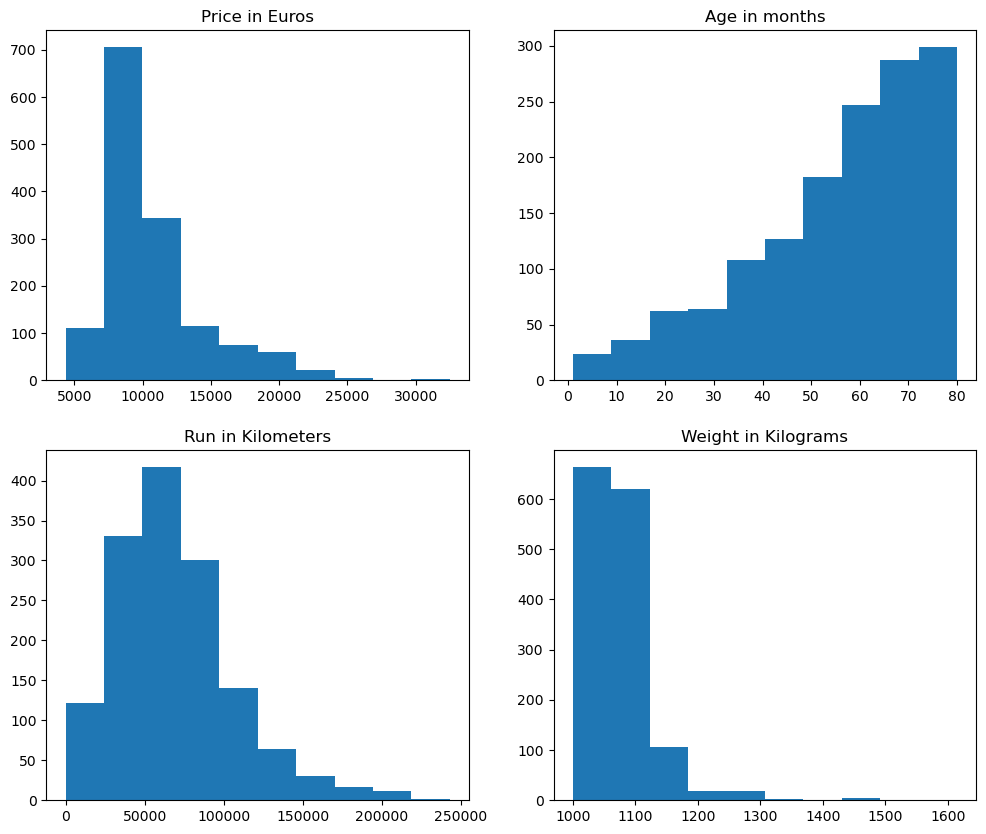

In [46]:
plt.subplots(figsize = (12,10))
plt.subplot(2,2,1)
plt.hist(crla_pr['Price'])
plt.title('Price in Euros')
plt.subplot(2,2,2)
plt.hist(crla_pr['Age_mns'])
plt.title('Age in months')
plt.subplot(2,2,3)
plt.hist(crla_pr['Run_KM'])
plt.title('Run in Kilometers')
plt.subplot(2,2,4)
plt.hist(crla_pr['Wt_Kgs'])
plt.title('Weight in Kilograms')
plt.show()

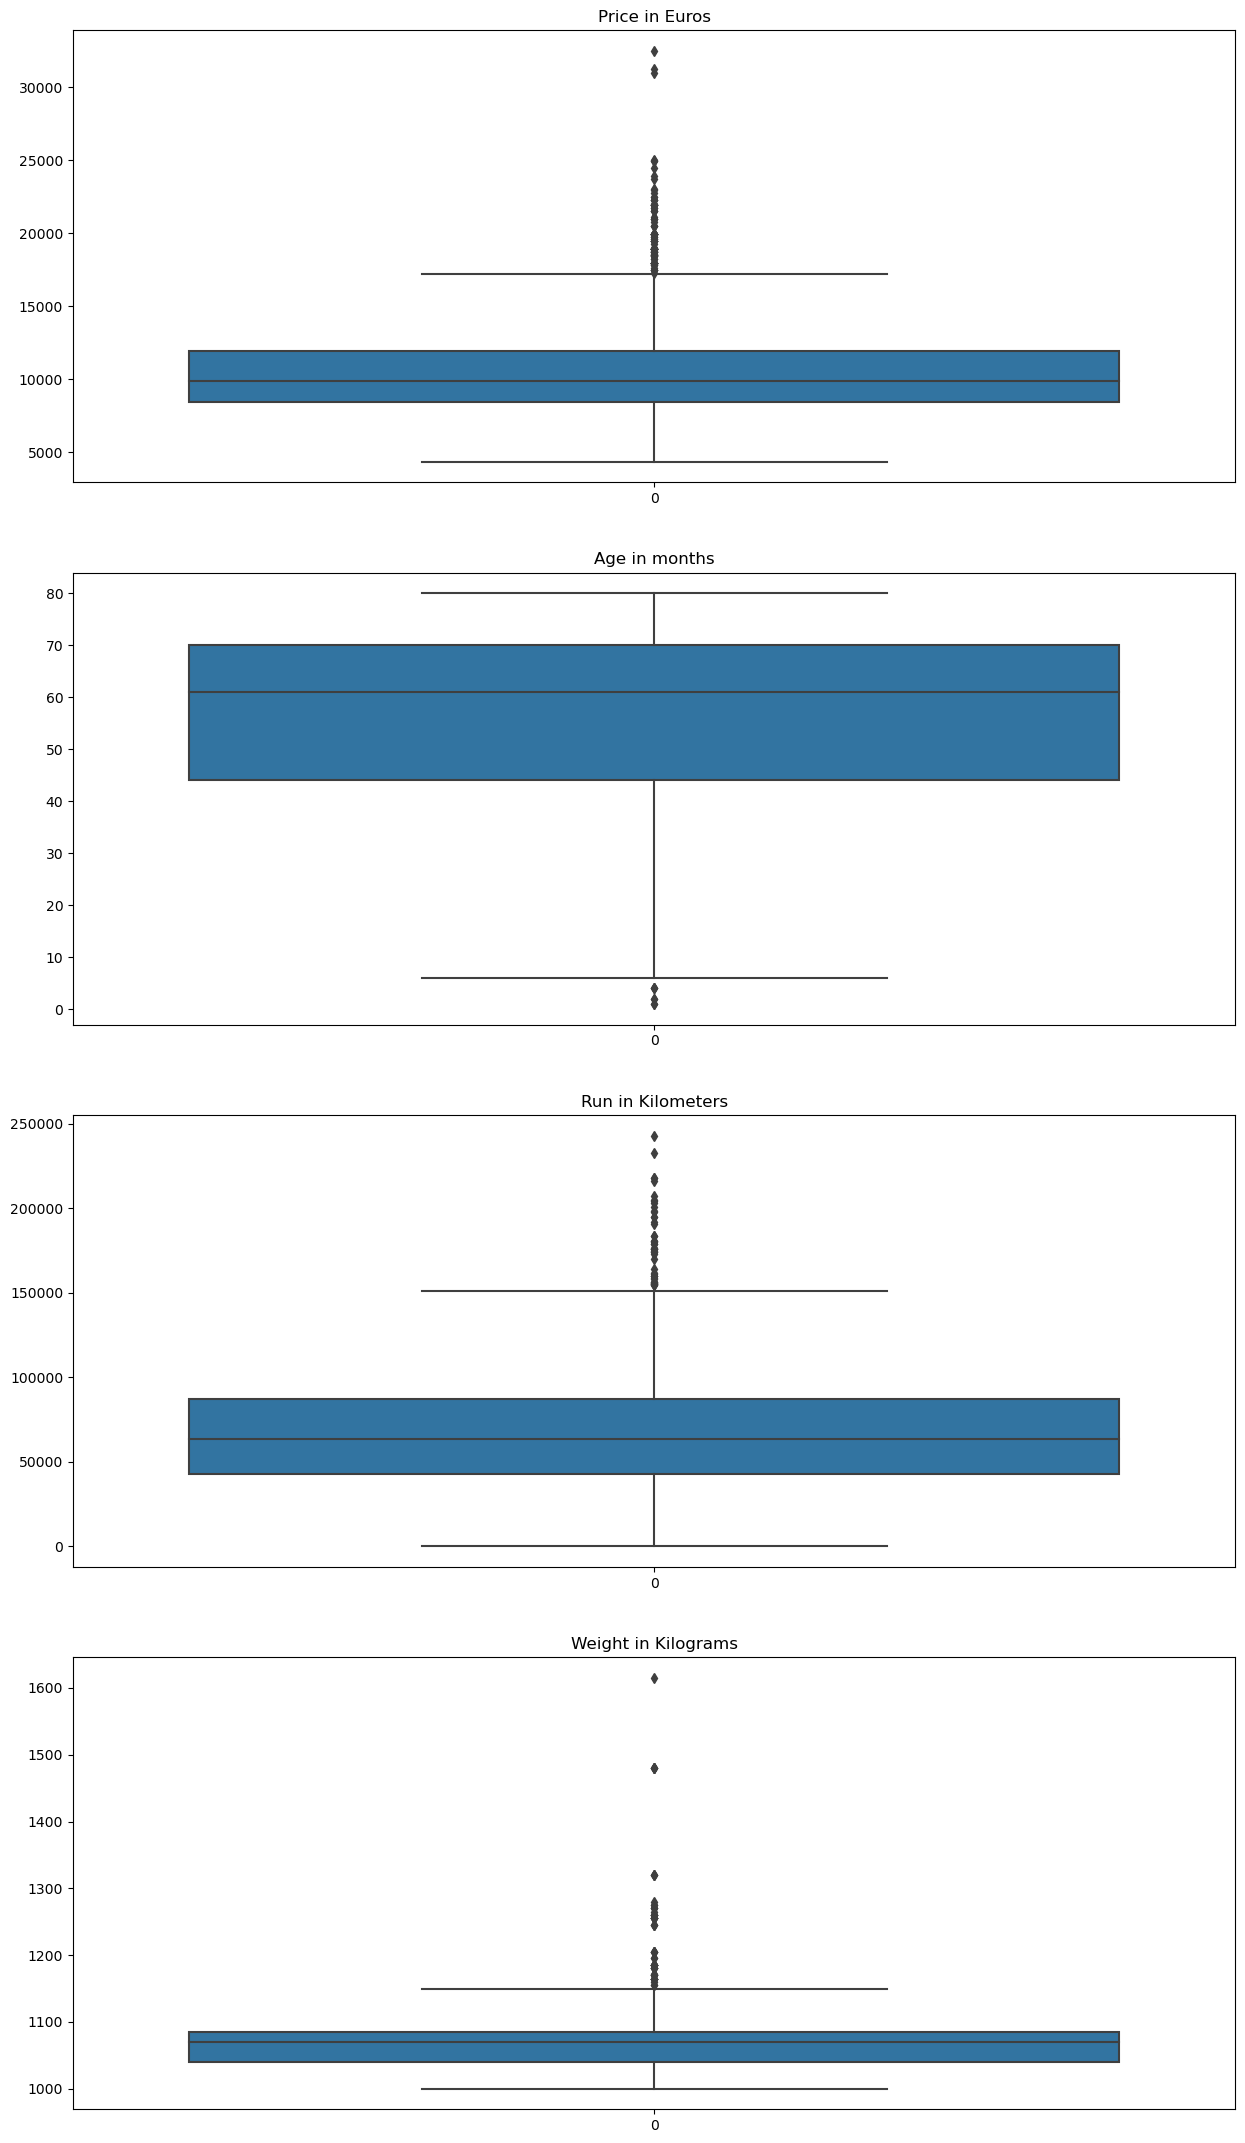

In [47]:
plt.subplots(figsize = (15,27))
plt.subplot(4,1,1)
sb.boxplot(crla_pr['Price'])
plt.title('Price in Euros')
plt.subplot(4,1,2)
sb.boxplot(crla_pr['Age_mns'])
plt.title('Age in months')
plt.subplot(4,1,3)
sb.boxplot(crla_pr['Run_KM'])
plt.title('Run in Kilometers')
plt.subplot(4,1,4)
sb.boxplot(crla_pr['Wt_Kgs'])
plt.title('Weight in Kilograms')
plt.show()

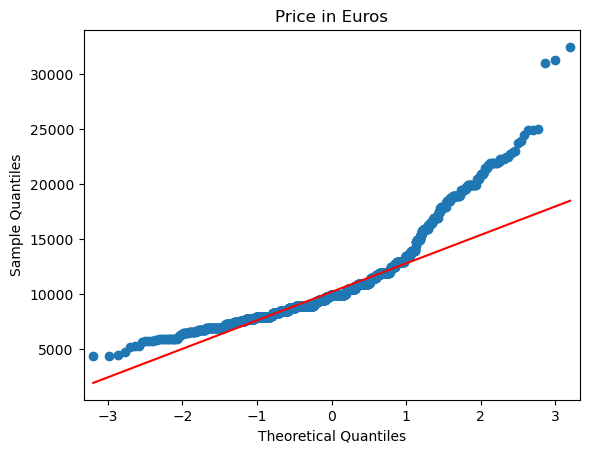

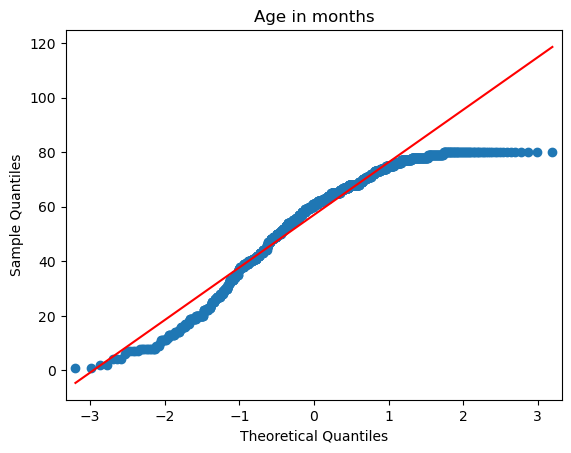

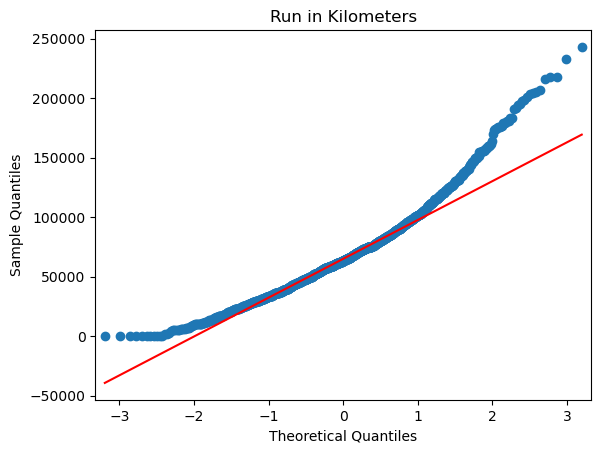

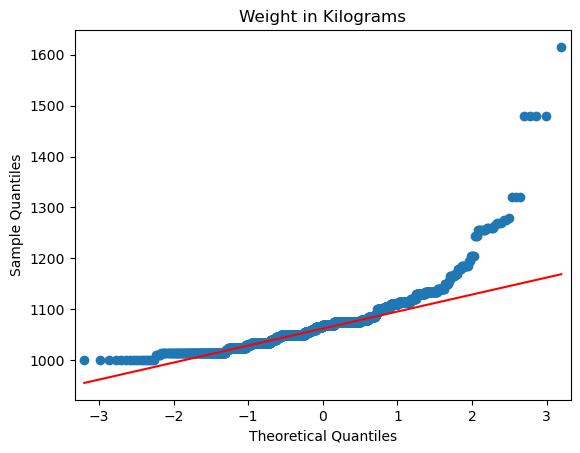

In [48]:
sm.qqplot(crla_pr['Price'], line = 'q')
plt.title('Price in Euros')
sm.qqplot(crla_pr['Age_mns'], line = 'q')
plt.title('Age in months')
sm.qqplot(crla_pr['Run_KM'], line = 'q')
plt.title('Run in Kilometers')
sm.qqplot(crla_pr['Wt_Kgs'], line = 'q')
plt.title('Weight in Kilograms')
plt.show()

In [49]:
crla_pr_cont.corr()

,Price,Age_mns,Run_KM,Wt_Kgs
Price,1.000000,-0.876590,-0.569960,0.581198
Age_mns,-0.876590,1.000000,0.505672,-0.470253
Run_KM,-0.569960,0.505672,1.000000,-0.028598
Wt_Kgs,0.581198,-0.470253,-0.028598,1.000000


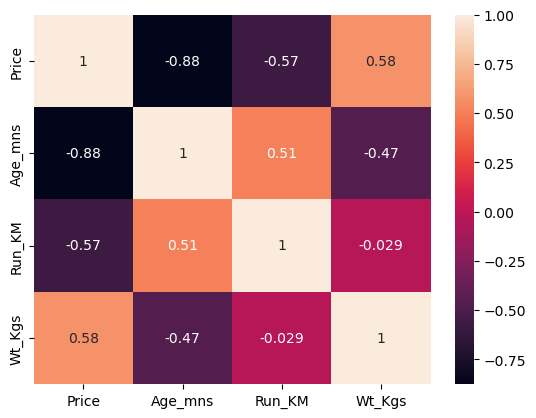

In [50]:
sb.heatmap(crla_pr_cont.corr(),annot=True)
plt.show()

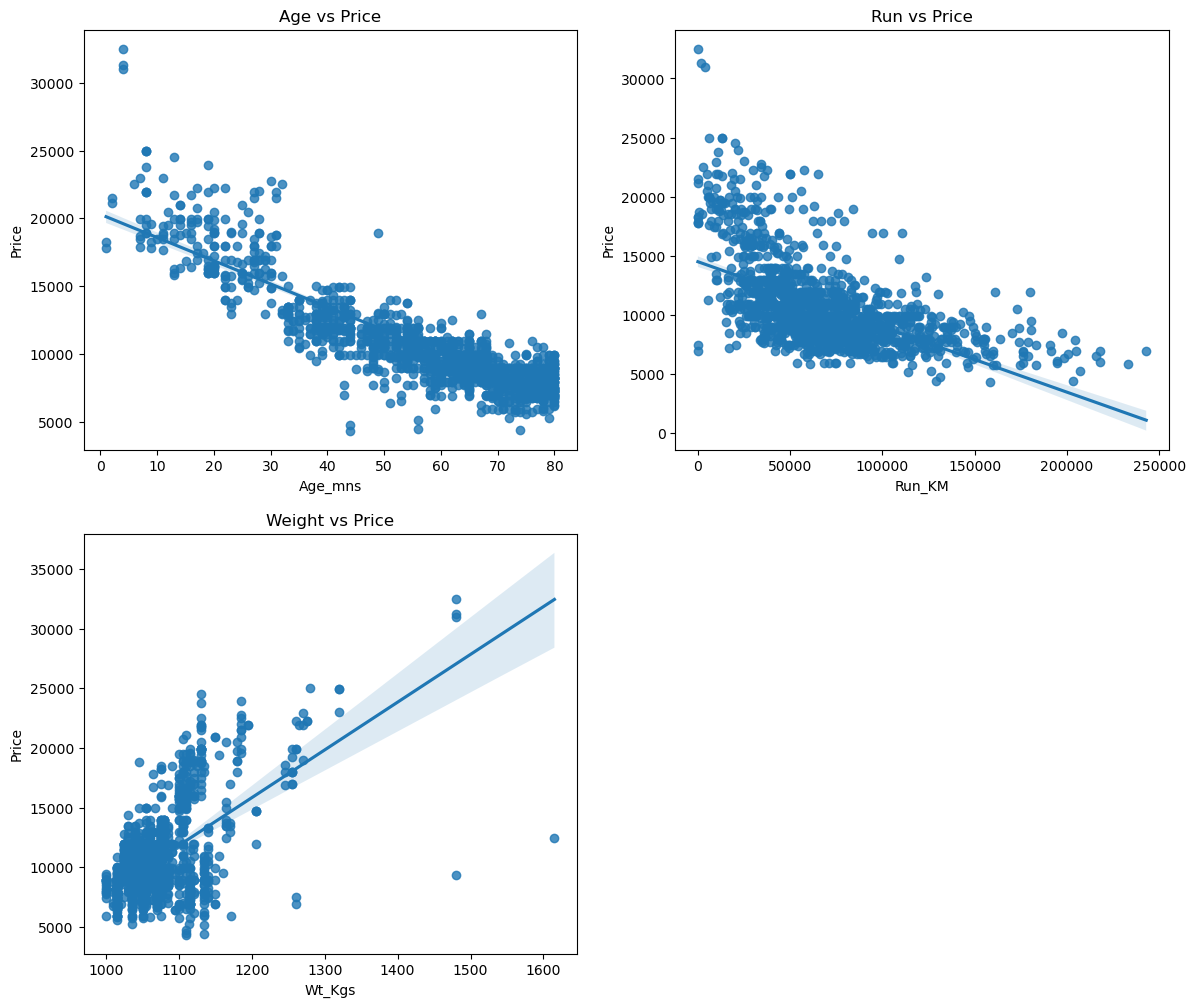

In [51]:
plt.subplots(figsize = (14,12))
plt.subplot(2,2,1)
sb.regplot(x=crla_pr_cont['Age_mns'],y=crla_pr['Price'])
plt.title('Age vs Price')
plt.subplot(2,2,2)
sb.regplot(x=crla_pr_cont['Run_KM'],y=crla_pr['Price'])
plt.title('Run vs Price')
plt.subplot(2,2,3)
sb.regplot(x=crla_pr_cont['Wt_Kgs'],y=crla_pr['Price'])
plt.title('Weight vs Price')
plt.show()

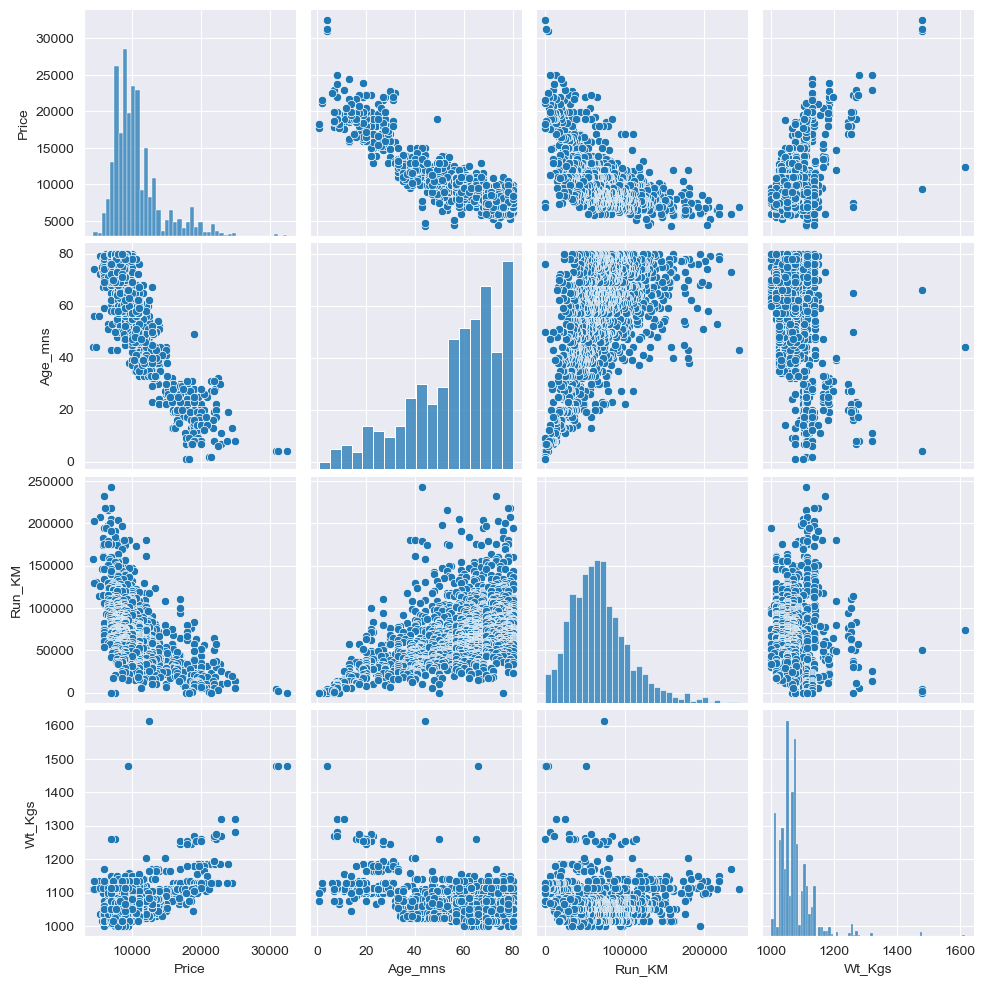

In [52]:
sb.set_style(style='darkgrid')
sb.pairplot(crla_pr_cont)
plt.show()

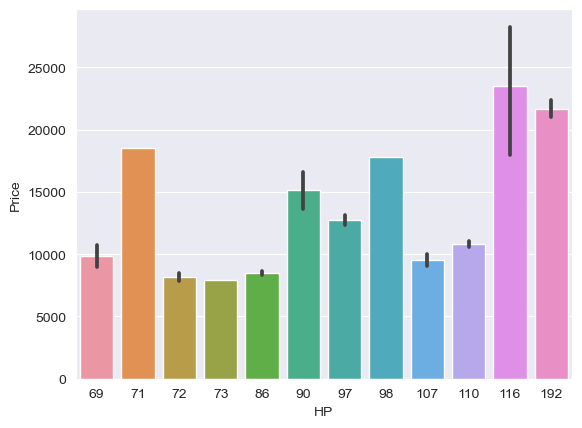

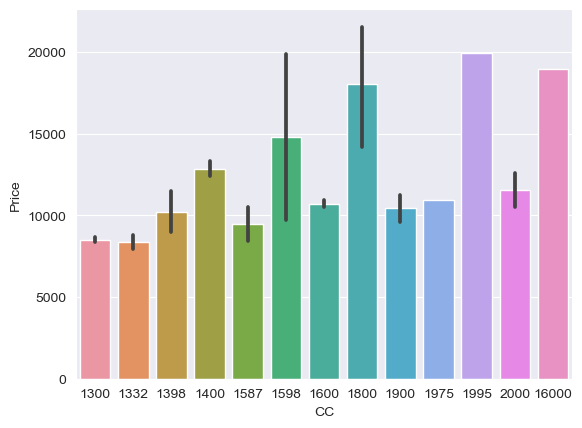

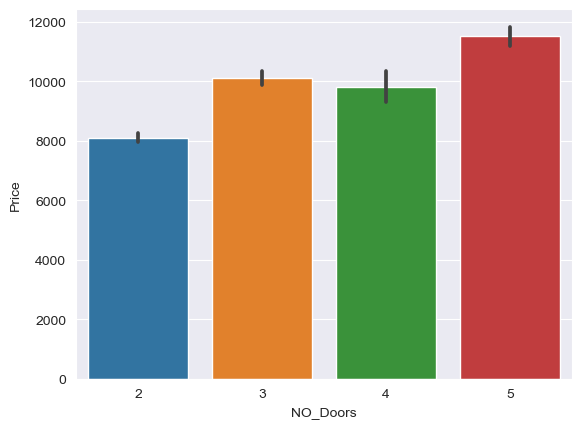

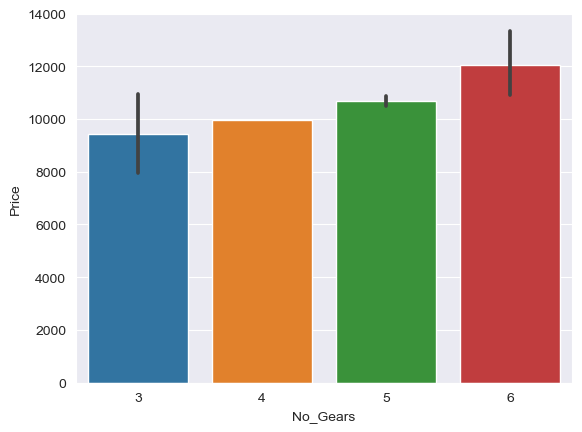

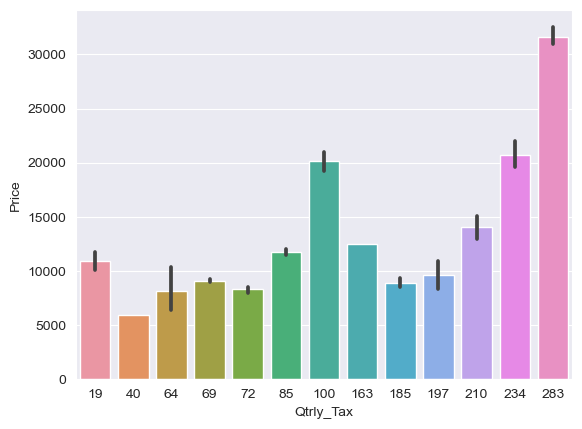

In [53]:
for i in crla_pr_dis.columns:
    plt.figure()
    sb.barplot(data=crla_pr,x=i,y='Price')
plt.show()

In [54]:
co_rel = pd.concat([crla_pr_dis,crla_pr['Price']],axis=1)
co_rel
co_rel.corr()

,HP,CC,NO_Doors,No_Gears,Qtrly_Tax,Price
HP,1.000000,0.035856,0.092424,0.209477,-0.298432,0.314990
CC,0.035856,1.000000,0.079903,0.014629,0.306996,0.126389
NO_Doors,0.092424,0.079903,1.000000,-0.160141,0.109363,0.185326
No_Gears,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.063104
Qtrly_Tax,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.219197
Price,0.314990,0.126389,0.185326,0.063104,0.219197,1.000000


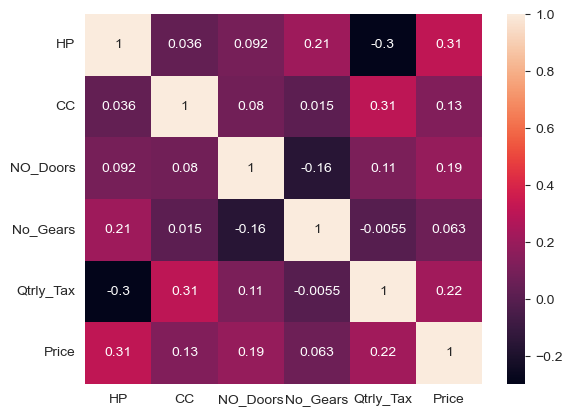

In [55]:
sb.heatmap(co_rel.corr(),annot=True)
plt.show()

In [56]:
model=smf.ols("Price~Age_mns+Run_KM+Wt_Kgs",data=crla_pr_cont).fit()

In [57]:
model.params

Intercept   -1880.335564
Age_mns      -120.221174
Run_KM         -0.024183
Wt_Kgs         19.576043
dtype: float64

In [58]:
model.resid

0      -3524.410447
1      -2646.840055
2      -3081.754062
3      -1689.225468
4      -2735.958524
           ...     
1431   -1893.034572
1432    1971.050989
1433    -542.149055
1434   -1914.788518
1435   -3840.543506
Length: 1436, dtype: float64

In [59]:
model.resid_pearson

array([-2.49066836, -1.87049746, -2.17784717, ..., -0.38313174,
       -1.35316339, -2.71407667])

In [60]:
pred=model.predict(crla_pr)
pred

0       17024.410447
1       16396.840055
2       17031.754062
3       16639.225468
4       16485.958524
            ...     
1431     9393.034572
1432     8873.949011
1433     9042.149055
1434     9164.788518
1435    10790.543506
Length: 1436, dtype: float64

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     2665.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:32:39   Log-Likelihood:                -12454.
No. Observations:                1436   AIC:                         2.492e+04
Df Residuals:                    1432   BIC:                         2.494e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1880.3356    962.718     -1.953      0.051   -3768.825       8.153
Age_mns     -120.2212      2.742    -43.841      0.000    -125.600    -114.842
Run_KM        -0.0242      0.001    -20.142      0.000      -0.027      -0.022
Wt_Kgs        19.5760      0.836     23.409      0.000      17.936      21.216
==============================================================================
Omnibus:                      221.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2197.082
Skew:                          -0.373   Prob(JB):                         0.00
Kurtosis:                       9.013   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
rmse=np.sqrt(model.mse_resid)
rmse

1415.0460603425736

In [63]:
Q1 = np.quantile(crla_pr_cont.Price,0.25)
Q3 = np.quantile(crla_pr_cont.Price,0.75)
IQR = Q3 - Q1
upper_fence = Q3+(1.5*IQR)
lower_fence = Q1-(1.5*IQR)
print('First Quartile=', Q1,'\n' 'Third Quartile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper fence =', upper_fence,'\n' 'Lower fence=', lower_fence)

First Quartile= 8450.0 
Third Quartile= 11950.0 
Inter-Quartile Range= 3500.0 
Upper fence = 17200.0 
Lower fence= 3200.0


In [64]:
crla_pr_cont[(crla_pr_cont.Price <= lower_fence) | (crla_pr_cont.Price >= upper_fence)]

,Price,Age_mns,Run_KM,Wt_Kgs
7,18600,30,75889,1245
8,21500,27,19700,1185
10,20950,25,31461,1185
11,19950,22,43610,1185
12,19600,25,32189,1185
...,...,...,...,...
182,21125,2,225,1110
183,21500,2,15,1130
184,17795,1,1,1100
185,18245,1,1,1075


In [65]:
Q1 = np.quantile(crla_pr_cont.Age_mns,0.25)
Q3 = np.quantile(crla_pr_cont.Age_mns,0.75)
IQR = Q3 - Q1
upper_fence = Q3+(1.5*IQR)
lower_fence = Q1-(1.5*IQR)
print('First Quartile=', Q1,'\n' 'Third Quartile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper fence =', upper_fence,'\n' 'Lower fence=', lower_fence)

First Quartile= 44.0 
Third Quartile= 70.0 
Inter-Quartile Range= 26.0 
Upper fence = 109.0 
Lower fence= 5.0


In [66]:
crla_pr_cont[(crla_pr_cont.Age_mns <= lower_fence) | (crla_pr_cont.Age_mns >= upper_fence)]

,Price,Age_mns,Run_KM,Wt_Kgs
109,32500,4,1,1480
110,31000,4,4000,1480
111,31275,4,1500,1480
182,21125,2,225,1110
183,21500,2,15,1130
184,17795,1,1,1100
185,18245,1,1,1075


In [67]:
Q1 = np.quantile(crla_pr_cont.Run_KM,0.25)
Q3 = np.quantile(crla_pr_cont.Run_KM,0.75)
IQR = Q3 - Q1
upper_fence = Q3+(1.5*IQR)
lower_fence = Q1-(1.5*IQR)
print('First Quartile=', Q1,'\n' 'Third Quartile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper fence =', upper_fence,'\n' 'Lower fence=', lower_fence)

First Quartile= 43000.0 
Third Quartile= 87020.75 
Inter-Quartile Range= 44020.75 
Upper fence = 153051.875 
Lower fence= -23031.125


In [68]:
crla_pr_cont[(crla_pr_cont.Run_KM <= lower_fence) | (crla_pr_cont.Run_KM >= upper_fence)]

,Price,Age_mns,Run_KM,Wt_Kgs
186,6950,43,243000,1110
187,9500,38,180638,1160
188,11950,40,179860,1205
189,7750,43,178858,1084
190,11950,40,161000,1105
191,4350,44,158320,1110
378,6500,53,216000,1110
379,6400,51,198167,1095
380,7000,53,176000,1105
381,7750,54,174139,1100


In [69]:
Q1 = np.quantile(crla_pr_cont.Wt_Kgs,0.25)
Q3 = np.quantile(crla_pr_cont.Wt_Kgs,0.75)
IQR = Q3 - Q1
upper_fence = Q3+(1.5*IQR)
lower_fence = Q1-(1.5*IQR)
print('First Quartile=', Q1,'\n' 'Third Quartile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper fence =', upper_fence,'\n' 'Lower fence=', lower_fence)

First Quartile= 1040.0 
Third Quartile= 1085.0 
Inter-Quartile Range= 45.0 
Upper fence = 1152.5 
Lower fence= 972.5


In [70]:
crla_pr_cont[(crla_pr_cont.Wt_Kgs <= lower_fence) | (crla_pr_cont.Wt_Kgs >= upper_fence)]

,Price,Age_mns,Run_KM,Wt_Kgs
0,13500,23,46986,1165
1,13750,23,72937,1165
2,13950,24,41711,1165
3,14950,26,48000,1165
4,13750,30,38500,1170
...,...,...,...,...
601,7500,50,1,1260
654,6950,65,114383,1260
768,10950,59,78750,1155
960,9390,66,50806,1480


In [71]:
crla_pr_cont1 = crla_pr_cont.copy()
for i in crla_pr_cont1['Price']:
    Q1 = np.quantile(crla_pr_cont1.Price,0.25)
    Q3 = np.quantile(crla_pr_cont1.Price,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont1['Price']=crla_pr_cont1['Price'].replace(i,np.mean(crla_pr_cont1['Price']))
crla_pr_cont1

,Price,Age_mns,Run_KM,Wt_Kgs
0,13500.000000,23,46986,1165
1,13750.000000,23,72937,1165
2,13950.000000,24,41711,1165
3,10249.485699,26,48000,1165
4,13750.000000,30,38500,1170
...,...,...,...,...
1431,7500.000000,69,20544,1025
1432,10845.000000,72,19000,1015
1433,8500.000000,71,17016,1015
1434,7250.000000,70,16916,1015


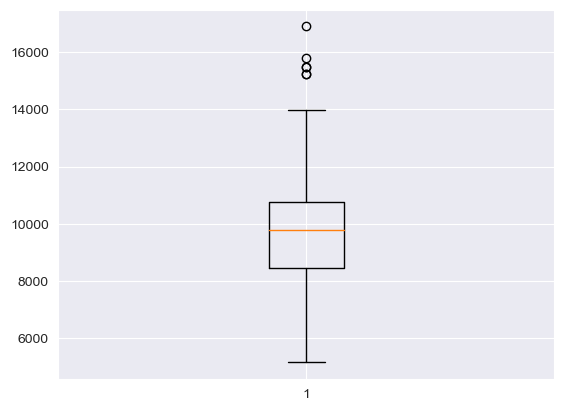

In [72]:
plt.boxplot(crla_pr_cont1['Price'])
plt.show()

In [73]:
for i in crla_pr_cont1['Age_mns']:
    Q1 = np.quantile(crla_pr_cont1.Age_mns,0.25)
    Q3 = np.quantile(crla_pr_cont1.Age_mns,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont1['Age_mns']=crla_pr_cont1['Age_mns'].replace(i,np.mean(crla_pr_cont1['Age_mns']))
crla_pr_cont1

,Price,Age_mns,Run_KM,Wt_Kgs
0,13500.000000,23.0,46986,1165
1,13750.000000,23.0,72937,1165
2,13950.000000,24.0,41711,1165
3,10249.485699,26.0,48000,1165
4,13750.000000,30.0,38500,1170
...,...,...,...,...
1431,7500.000000,69.0,20544,1025
1432,10845.000000,72.0,19000,1015
1433,8500.000000,71.0,17016,1015
1434,7250.000000,70.0,16916,1015


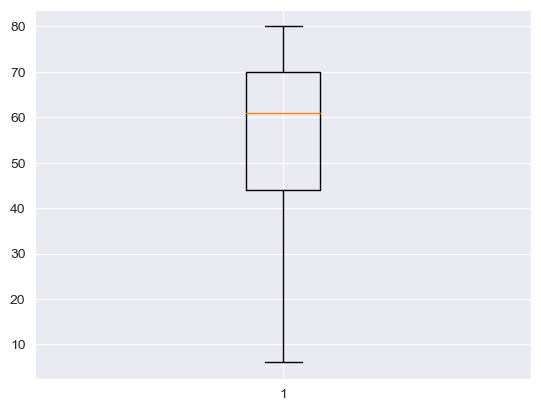

In [74]:
plt.boxplot(crla_pr_cont1['Age_mns'])
plt.show()

In [75]:
for i in crla_pr_cont1['Run_KM']:
    Q1 = np.quantile(crla_pr_cont1.Run_KM,0.25)
    Q3 = np.quantile(crla_pr_cont1.Run_KM,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont1['Run_KM']=crla_pr_cont1['Run_KM'].replace(i,np.mean(crla_pr_cont1['Run_KM']))
crla_pr_cont1

,Price,Age_mns,Run_KM,Wt_Kgs
0,13500.000000,23.0,46986.0,1165
1,13750.000000,23.0,72937.0,1165
2,13950.000000,24.0,41711.0,1165
3,10249.485699,26.0,48000.0,1165
4,13750.000000,30.0,38500.0,1170
...,...,...,...,...
1431,7500.000000,69.0,20544.0,1025
1432,10845.000000,72.0,19000.0,1015
1433,8500.000000,71.0,17016.0,1015
1434,7250.000000,70.0,16916.0,1015


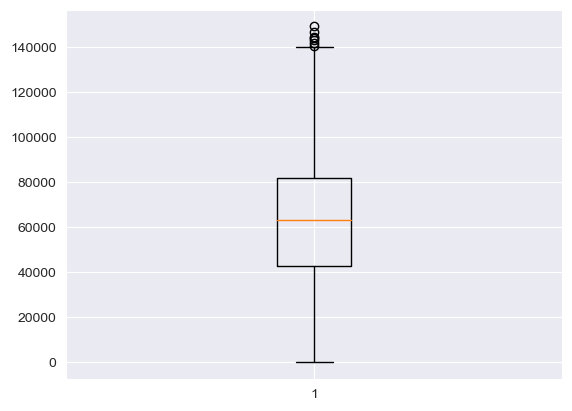

In [76]:
plt.boxplot(crla_pr_cont1['Run_KM'])
plt.show()

In [77]:
for i in crla_pr_cont1['Wt_Kgs']:
    Q1 = np.quantile(crla_pr_cont1.Wt_Kgs,0.25)
    Q3 = np.quantile(crla_pr_cont1.Wt_Kgs,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont1['Wt_Kgs']=crla_pr_cont1['Wt_Kgs'].replace(i,np.mean(crla_pr_cont1['Wt_Kgs']))
crla_pr_cont1

,Price,Age_mns,Run_KM,Wt_Kgs
0,13500.000000,23.0,46986.0,1072.459610
1,13750.000000,23.0,72937.0,1072.459610
2,13950.000000,24.0,41711.0,1072.459610
3,10249.485699,26.0,48000.0,1072.459610
4,13750.000000,30.0,38500.0,1071.944065
...,...,...,...,...
1431,7500.000000,69.0,20544.0,1025.000000
1432,10845.000000,72.0,19000.0,1015.000000
1433,8500.000000,71.0,17016.0,1015.000000
1434,7250.000000,70.0,16916.0,1015.000000


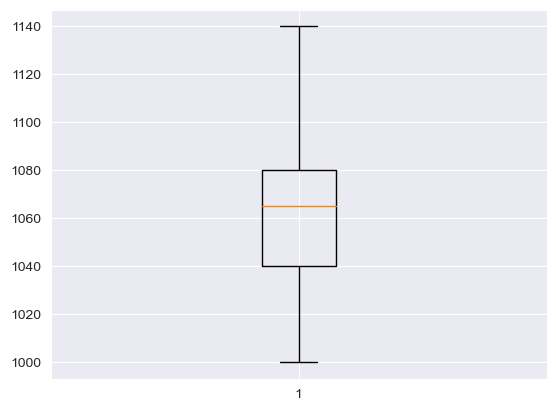

In [78]:
plt.boxplot(crla_pr_cont1['Wt_Kgs'])
plt.show()

In [79]:
crla_pr_cont2 = crla_pr_cont.copy()
for i in crla_pr_cont2['Price']:
    Q1 = np.quantile(crla_pr_cont2.Price,0.25)
    Q3 = np.quantile(crla_pr_cont2.Price,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont2['Price']=crla_pr_cont2['Price'].replace(i,np.median(crla_pr_cont2['Price']))
crla_pr_cont2

,Price,Age_mns,Run_KM,Wt_Kgs
0,13500,23,46986,1165
1,13750,23,72937,1165
2,13950,24,41711,1165
3,9900,26,48000,1165
4,13750,30,38500,1170
...,...,...,...,...
1431,7500,69,20544,1025
1432,10845,72,19000,1015
1433,8500,71,17016,1015
1434,7250,70,16916,1015


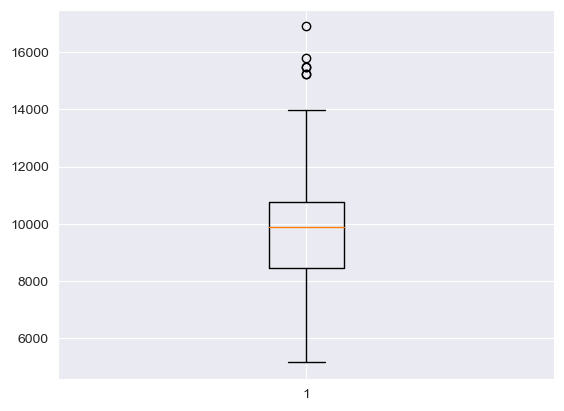

In [80]:
plt.boxplot(crla_pr_cont2['Price'])
plt.show()

In [81]:
for i in crla_pr_cont2['Age_mns']:
    Q1 = np.quantile(crla_pr_cont2.Age_mns,0.25)
    Q3 = np.quantile(crla_pr_cont2.Age_mns,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont2['Age_mns']=crla_pr_cont2['Age_mns'].replace(i,np.median(crla_pr_cont2['Age_mns']))
crla_pr_cont2

,Price,Age_mns,Run_KM,Wt_Kgs
0,13500,23,46986,1165
1,13750,23,72937,1165
2,13950,24,41711,1165
3,9900,26,48000,1165
4,13750,30,38500,1170
...,...,...,...,...
1431,7500,69,20544,1025
1432,10845,72,19000,1015
1433,8500,71,17016,1015
1434,7250,70,16916,1015


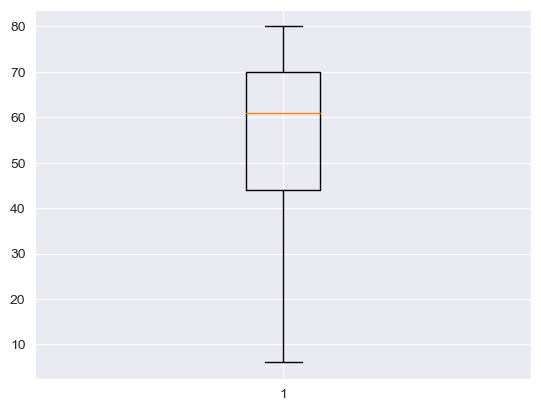

In [82]:
plt.boxplot(crla_pr_cont2['Age_mns'])
plt.show()

In [83]:
for i in crla_pr_cont2['Run_KM']:
    Q1 = np.quantile(crla_pr_cont2.Run_KM,0.25)
    Q3 = np.quantile(crla_pr_cont2.Run_KM,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont2['Run_KM']=crla_pr_cont2['Run_KM'].replace(i,np.median(crla_pr_cont2['Run_KM']))
crla_pr_cont2

,Price,Age_mns,Run_KM,Wt_Kgs
0,13500,23,46986.0,1165
1,13750,23,72937.0,1165
2,13950,24,41711.0,1165
3,9900,26,48000.0,1165
4,13750,30,38500.0,1170
...,...,...,...,...
1431,7500,69,20544.0,1025
1432,10845,72,19000.0,1015
1433,8500,71,17016.0,1015
1434,7250,70,16916.0,1015


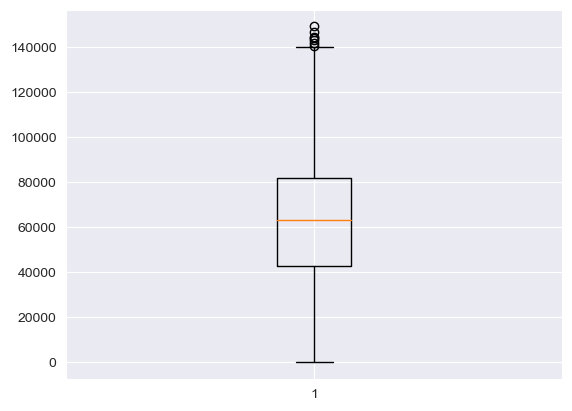

In [84]:
plt.boxplot(crla_pr_cont2['Run_KM'])
plt.show()

In [85]:
for i in crla_pr_cont2['Wt_Kgs']:
    Q1 = np.quantile(crla_pr_cont2.Wt_Kgs,0.25)
    Q3 = np.quantile(crla_pr_cont2.Wt_Kgs,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont2['Wt_Kgs']=crla_pr_cont2['Wt_Kgs'].replace(i,np.median(crla_pr_cont2['Wt_Kgs']))
crla_pr_cont2

,Price,Age_mns,Run_KM,Wt_Kgs
0,13500,23,46986.0,1070
1,13750,23,72937.0,1070
2,13950,24,41711.0,1070
3,9900,26,48000.0,1070
4,13750,30,38500.0,1070
...,...,...,...,...
1431,7500,69,20544.0,1025
1432,10845,72,19000.0,1015
1433,8500,71,17016.0,1015
1434,7250,70,16916.0,1015


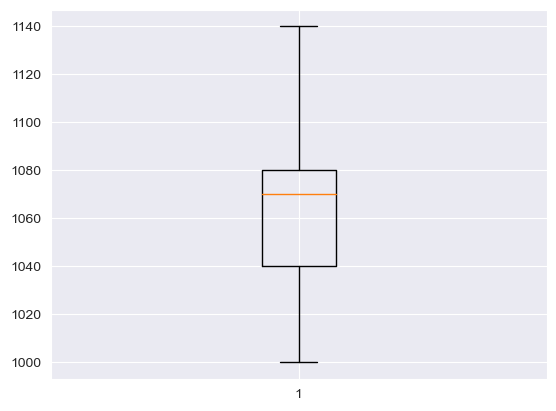

In [86]:
plt.boxplot(crla_pr_cont2['Wt_Kgs'])
plt.show()

In [87]:
crla_pr_cont3=crla_pr_cont.copy()
for i in crla_pr_cont3['Price']:
    Q1 = np.quantile(crla_pr_cont3.Price,0.25)
    Q3 = np.quantile(crla_pr_cont3.Price,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont3.drop(crla_pr_cont3[crla_pr_cont3['Price']==i].index,inplace=True)
crla_pr_cont3.shape

(1282, 4)

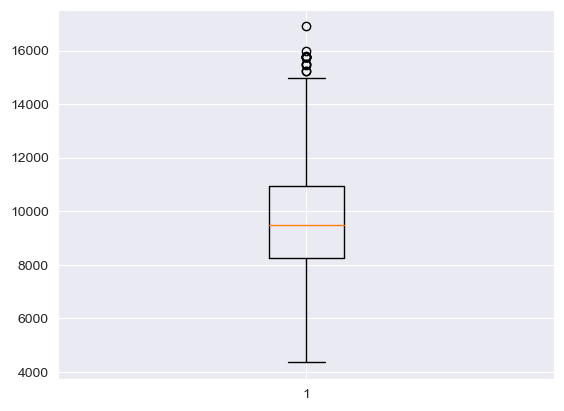

In [88]:
plt.boxplot(crla_pr_cont3['Price'])
plt.show()

In [89]:
for i in crla_pr_cont3['Age_mns']:
    Q1 = np.quantile(crla_pr_cont3.Age_mns,0.25)
    Q3 = np.quantile(crla_pr_cont3.Age_mns,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont3.drop(crla_pr_cont3[crla_pr_cont3['Age_mns']==i].index,inplace=True)
crla_pr_cont3.shape

(1282, 4)

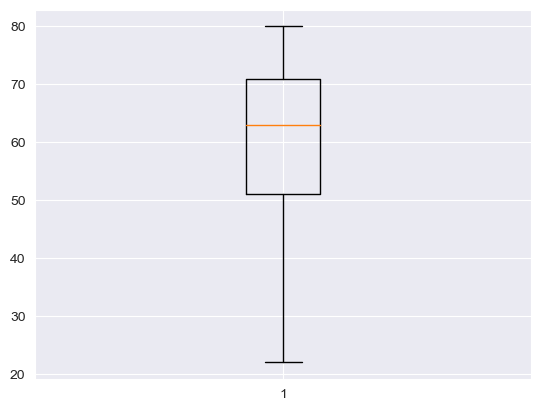

In [90]:
plt.boxplot(crla_pr_cont3['Age_mns'])
plt.show()

In [91]:
for i in crla_pr_cont3['Run_KM']:
    Q1 = np.quantile(crla_pr_cont3.Run_KM,0.25)
    Q3 = np.quantile(crla_pr_cont3.Run_KM,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont3.drop(crla_pr_cont3[crla_pr_cont3['Run_KM']==i].index,inplace=True)
crla_pr_cont3.shape

(1225, 4)

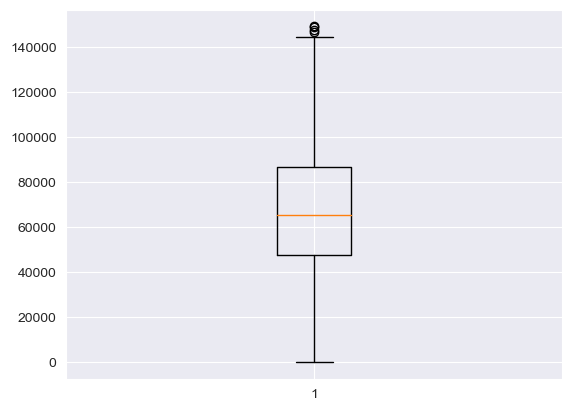

In [92]:
plt.boxplot(crla_pr_cont3['Run_KM'])
plt.show()

In [93]:
for i in crla_pr_cont3['Wt_Kgs']:
    Q1 = np.quantile(crla_pr_cont3.Wt_Kgs,0.25)
    Q3 = np.quantile(crla_pr_cont3.Wt_Kgs,0.75)
    IQR = Q3 - Q1
    upper_fence = Q3+(1.5*IQR)
    lower_fence = Q1-(1.5*IQR)
    if i > upper_fence or i < lower_fence:
        crla_pr_cont3.drop(crla_pr_cont3[crla_pr_cont3['Wt_Kgs']==i].index,inplace=True)
crla_pr_cont3.shape

(1190, 4)

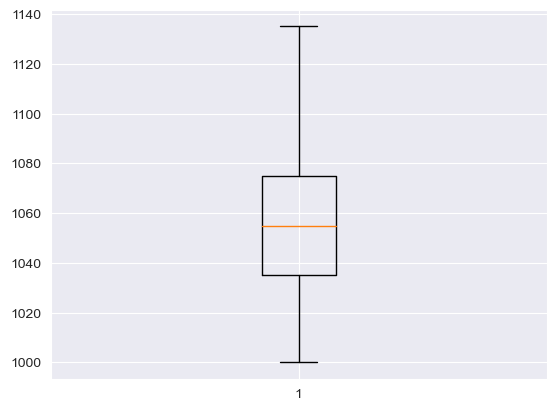

In [94]:
plt.boxplot(crla_pr_cont3['Wt_Kgs'])
plt.show()

In [95]:
model_1 = smf.ols("Price~Age_mns+Run_KM+Wt_Kgs",data=crla_pr_cont1).fit()

In [96]:
pred_1 = model_1.predict(crla_pr_cont1)
pred_1

0       11673.626807
1       11531.133850
2       11645.682389
3       11497.333191
4       11322.427572
            ...     
1431     9253.111037
1432     9101.839152
1433     9169.641624
1434     9227.099342
1435     8869.861364
Length: 1436, dtype: float64

In [97]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     302.0
Date:                Wed, 27 Mar 2024   Prob (F-statistic):          6.89e-152
Time:                        19:43:32   Log-Likelihood:                -12449.
No. Observations:                1436   AIC:                         2.491e+04
Df Residuals:                    1432   BIC:                         2.493e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.442e+04   1384.951     10.410      0.000    1.17e+04    1.71e+04
Age_mns      -56.9086      2.634    -21.603      0.000     -62.076     -51.741
Run_KM        -0.0055      0.001     -3.676      0.000      -0.008      -0.003
Wt_Kgs        -1.0976      1.257     -0.873      0.383      -3.563       1.368
==============================================================================
Omnibus:                        8.581   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.694
Skew:                           0.182   Prob(JB):                       0.0129
Kurtosis:                       2.890   Cond. No.                     2.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
rmse_1 = np.sqrt(model_1.mse_resid)
rmse_1

1410.333986761935

In [99]:
model_2 = smf.ols("Price~Age_mns+Run_KM+Wt_Kgs",data=crla_pr_cont2).fit()

In [100]:
pred_2 = model_2.predict(crla_pr_cont2)
pred_2

0       11513.263224
1       11384.183920
2       11485.904080
3       11347.429234
4       11180.294689
            ...     
1431     9260.821983
1432     9125.820260
1433     9189.285399
1434     9243.379593
1435     8826.655561
Length: 1436, dtype: float64

In [101]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     246.5
Date:                Wed, 27 Mar 2024   Prob (F-statistic):          5.92e-129
Time:                        19:44:26   Log-Likelihood:                -12492.
No. Observations:                1436   AIC:                         2.499e+04
Df Residuals:                    1432   BIC:                         2.501e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.492e+04   1424.870     10.469      0.000    1.21e+04    1.77e+04
Age_mns      -53.5968      2.701    -19.845      0.000     -58.895     -48.299
Run_KM        -0.0050      0.002     -3.245      0.001      -0.008      -0.002
Wt_Kgs        -1.8109      1.293     -1.401      0.162      -4.347       0.725
==============================================================================
Omnibus:                       15.427   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.175
Skew:                           0.227   Prob(JB):                     0.000507
Kurtosis:                       2.783   Cond. No.                     2.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
rmse_2 = np.sqrt(model_2.mse_resid)
rmse_2

1453.6175028749249

In [103]:
model_3 = smf.ols("Price~Age_mns+Run_KM+Wt_Kgs",data=crla_pr_cont3).fit()

In [104]:
pred_3 = model_3.predict(crla_pr_cont3)
pred_3

9       14025.041525
27      14124.027861
30      14427.183670
31      14682.051409
33      14329.296252
            ...     
1431     9375.805970
1432     8984.567853
1433     9117.685303
1434     9218.380806
1435    10112.388566
Length: 1190, dtype: float64

In [105]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1041.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:45:08   Log-Likelihood:                -9951.2
No. Observations:                1190   AIC:                         1.991e+04
Df Residuals:                    1186   BIC:                         1.993e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4167.8648   1193.059      3.493      0.000    1827.123    6508.607
Age_mns      -98.9746      2.526    -39.181      0.000    -103.931     -94.018
Run_KM        -0.0172      0.001    -14.234      0.000      -0.020      -0.015
Wt_Kgs        12.0885      1.100     10.987      0.000       9.930      14.247
==============================================================================
Omnibus:                       93.202   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.625
Skew:                          -0.391   Prob(JB):                     7.69e-59
Kurtosis:                       5.188   Cond. No.                     2.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
rmse_3 = np.sqrt(model_3.mse_resid)
rmse_3

1038.0259523718778

In [107]:
Slr_Age = smf.ols("Price~Age_mns",data=crla_pr_cont).fit()

In [108]:
Slr_Age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:45:49   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_mns     -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
Slr_Run = smf.ols("Price~Run_KM",data=crla_pr_cont).fit()

In [110]:
Slr_Run.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Wed, 27 Mar 2024   Prob (F-statistic):          1.76e-124
Time:                        19:46:15   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
Run_KM        -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
Slr_Wt = smf.ols("Price~Wt_Kgs",data=crla_pr_cont).fit()

In [112]:
Slr_Wt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Wed, 27 Mar 2024   Prob (F-statistic):          1.63e-130
Time:                        19:46:40   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Wt_Kgs        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
arw_pr = smf.ols("Price~Age_mns+Run_KM+Wt_Kgs",data=crla_pr_cont).fit()

In [114]:
arw_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     2665.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:47:06   Log-Likelihood:                -12454.
No. Observations:                1436   AIC:                         2.492e+04
Df Residuals:                    1432   BIC:                         2.494e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1880.3356    962.718     -1.953      0.051   -3768.825       8.153
Age_mns     -120.2212      2.742    -43.841      0.000    -125.600    -114.842
Run_KM        -0.0242      0.001    -20.142      0.000      -0.027      -0.022
Wt_Kgs        19.5760      0.836     23.409      0.000      17.936      21.216
==============================================================================
Omnibus:                      221.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2197.082
Skew:                          -0.373   Prob(JB):                         0.00
Kurtosis:                       9.013   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
rmse_arw_pr = np.sqrt(arw_pr.mse_resid)
rmse_arw_pr

1415.0460603425736

In [116]:
rsq_a = smf.ols('Age_mns~Run_KM+Wt_Kgs',data=crla_pr_cont).fit().rsquared  
vif_a = 1/(1-rsq_a)
vif_a

1.8643516843954984

In [117]:
rsq_r = smf.ols('Run_KM~Age_mns+Wt_Kgs',data=crla_pr_cont).fit().rsquared  
vif_r = 1/(1-rsq_r)
vif_r

1.4532611564553088

In [118]:
rsq_w = smf.ols('Wt_Kgs~Age_mns+Run_KM',data=crla_pr_cont).fit().rsquared  
vif_w = 1/(1-rsq_w)
vif_w

1.388764672646482

In [119]:
Age_Run = smf.ols("Price~Age_mns+Run_KM",data=crla_pr_cont).fit()

In [120]:
Age_Run.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2695.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:49:00   Log-Likelihood:                -12686.
No. Observations:                1436   AIC:                         2.538e+04
Df Residuals:                    1433   BIC:                         2.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04    140.047    146.259      0.000    2.02e+04    2.08e+04
Age_mns     -154.1492      2.736    -56.334      0.000    -159.517    -148.782
Run_KM        -0.0165      0.001    -12.130      0.000      -0.019      -0.014
==============================================================================
Omnibus:                      448.686   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.042
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      10.019   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
rmse_Age_Run = np.sqrt(Age_Run.mse_resid)
rmse_Age_Run

1663.337201159173

In [122]:
Run_Wt = smf.ols("Price~Run_KM+Wt_Kgs",data=crla_pr_cont).fit()

In [123]:
Run_Wt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1297.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):          2.62e-322
Time:                        19:49:36   Log-Likelihood:                -13065.
No. Observations:                1436   AIC:                         2.614e+04
Df Residuals:                    1433   BIC:                         2.615e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.737e+04   1173.812    -23.321      0.000   -2.97e+04   -2.51e+04
Run_KM        -0.0536      0.002    -35.132      0.000      -0.057      -0.051
Wt_Kgs        38.9532      1.086     35.866      0.000      36.823      41.084
==============================================================================
Omnibus:                      377.313   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4927.218
Skew:                          -0.843   Prob(JB):                         0.00
Kurtosis:                      11.916   Cond. No.                     1.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
rmse_Run_Wt = np.sqrt(Run_Wt.mse_resid)
rmse_Run_Wt

2164.8799726091506

In [125]:
Wt_Age = smf.ols("Price~Wt_Kgs+Age_mns",data=crla_pr_cont).fit()

In [126]:
Wt_Age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     2959.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:50:08   Log-Likelihood:                -12633.
No. Observations:                1436   AIC:                         2.527e+04
Df Residuals:                    1433   BIC:                         2.529e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3149.7074   1052.897      2.991      0.003    1084.324    5215.091
Wt_Kgs        14.9482      0.911     16.417      0.000      13.162      16.734
Age_mns     -151.0391      2.577    -58.610      0.000    -156.094    -145.984
==============================================================================
Omnibus:                      150.983   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              949.444
Skew:                          -0.249   Prob(JB):                    6.77e-207
Kurtosis:                       6.952   Cond. No.                     2.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
rmse_Wt_Age = np.sqrt(Wt_Age.mse_resid)
rmse_Wt_Age

1602.4473108941027

In [128]:
results = {"MODEL":pd.Series(["Raw data","Mean Imputation model","Median Imputation model","After removing outlier","Comb. of Age and Run","Comb. of Run and Weight","Comb. of Weight and Age"]),
           "R²_Values":pd.Series([model.rsquared,model_1.rsquared,model_2.rsquared,model_3.rsquared,Age_Run.rsquared,Run_Wt.rsquared,Wt_Age.rsquared]),
           "RMSE_Values":pd.Series([rmse,rmse_1,rmse_2,rmse_3,rmse_Age_Run,rmse_Run_Wt,rmse_Wt_Age])
          }
result_table=pd.DataFrame(results)
result_table 

,MODEL,R²_Values,RMSE_Values
0,Raw data,0.848104,1415.046060
1,Mean Imputation model,0.387509,1410.333987
2,Median Imputation model,0.340568,1453.617503
3,After removing outlier,0.724773,1038.025952
4,Comb. of Age and Run,0.789976,1663.337201
5,Comb. of Run and Weight,0.644225,2164.879973
6,Comb. of Weight and Age,0.805072,1602.447311


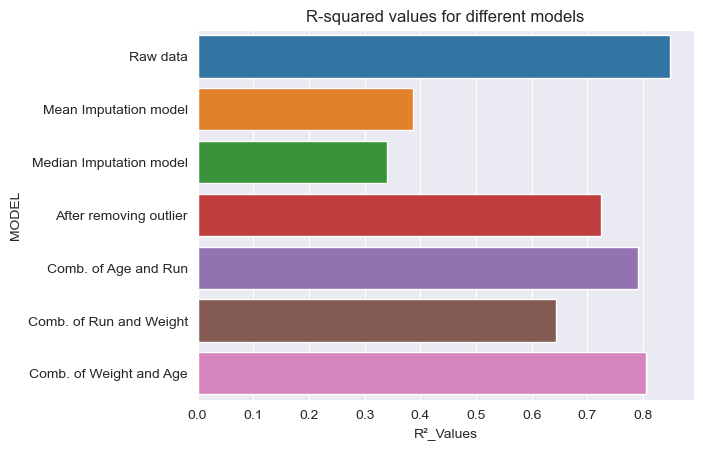

In [129]:
sb.barplot(x=result_table['R²_Values'],y=result_table['MODEL'])
plt.title("R-squared values for different models")
plt.show()

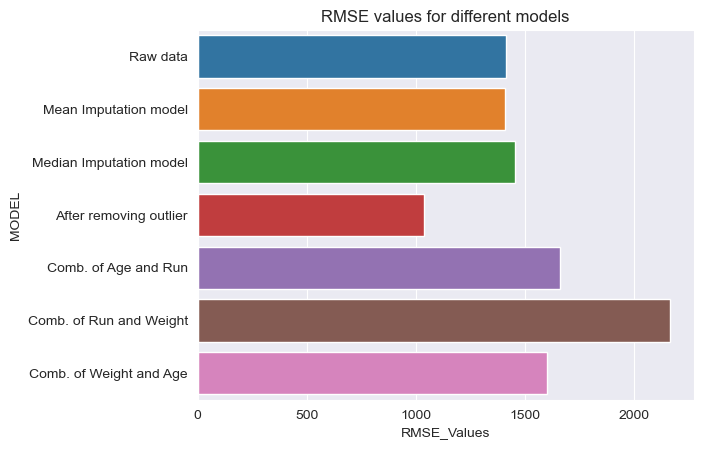

In [130]:
sb.barplot(x=result_table['RMSE_Values'],y=result_table['MODEL'])
plt.title("RMSE values for different models")
plt.show()

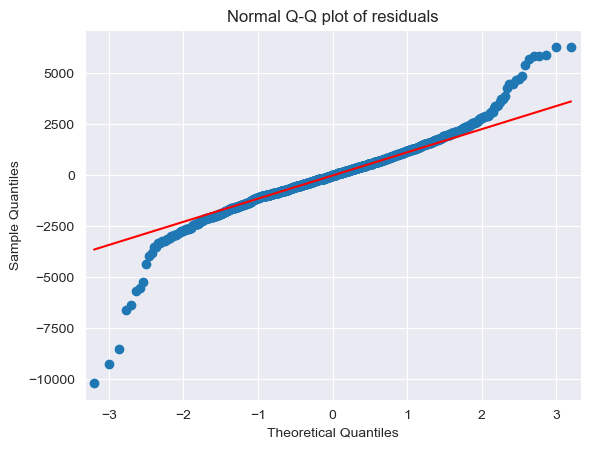

In [131]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [132]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

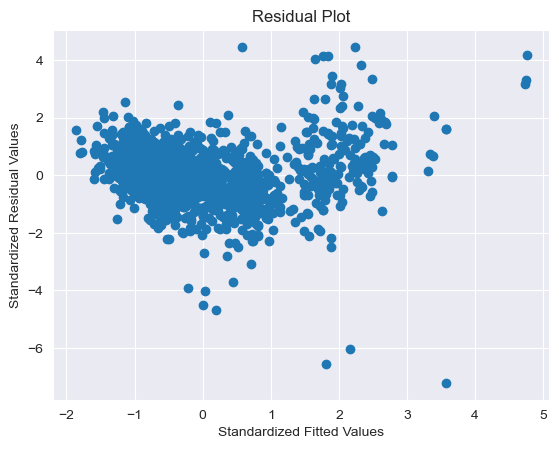

In [133]:
plt.scatter(get_standardized_values(model.fittedvalues), model.resid_pearson)
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

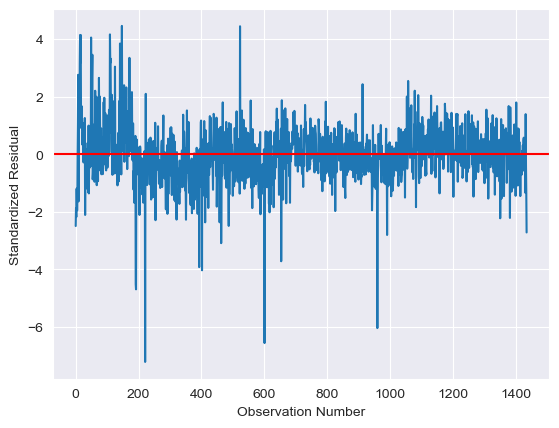

In [134]:
plt.plot(np.arange(len(crla_pr_cont)),model.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 
plt.show()

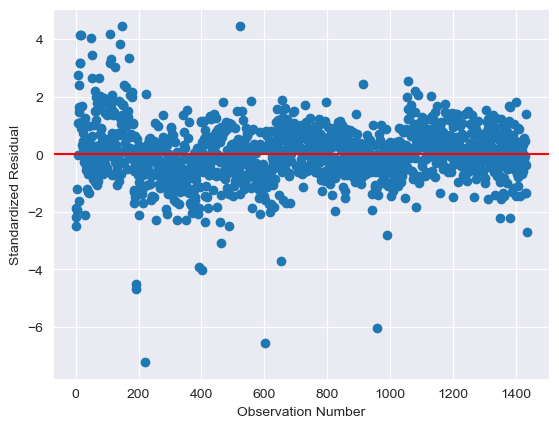

In [135]:
plt.scatter(np.arange(len(crla_pr_cont)),model.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")
plt.show()

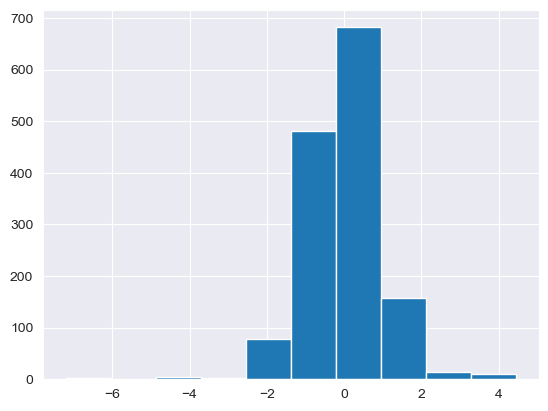

In [136]:
plt.hist(model.resid_pearson)
plt.show()

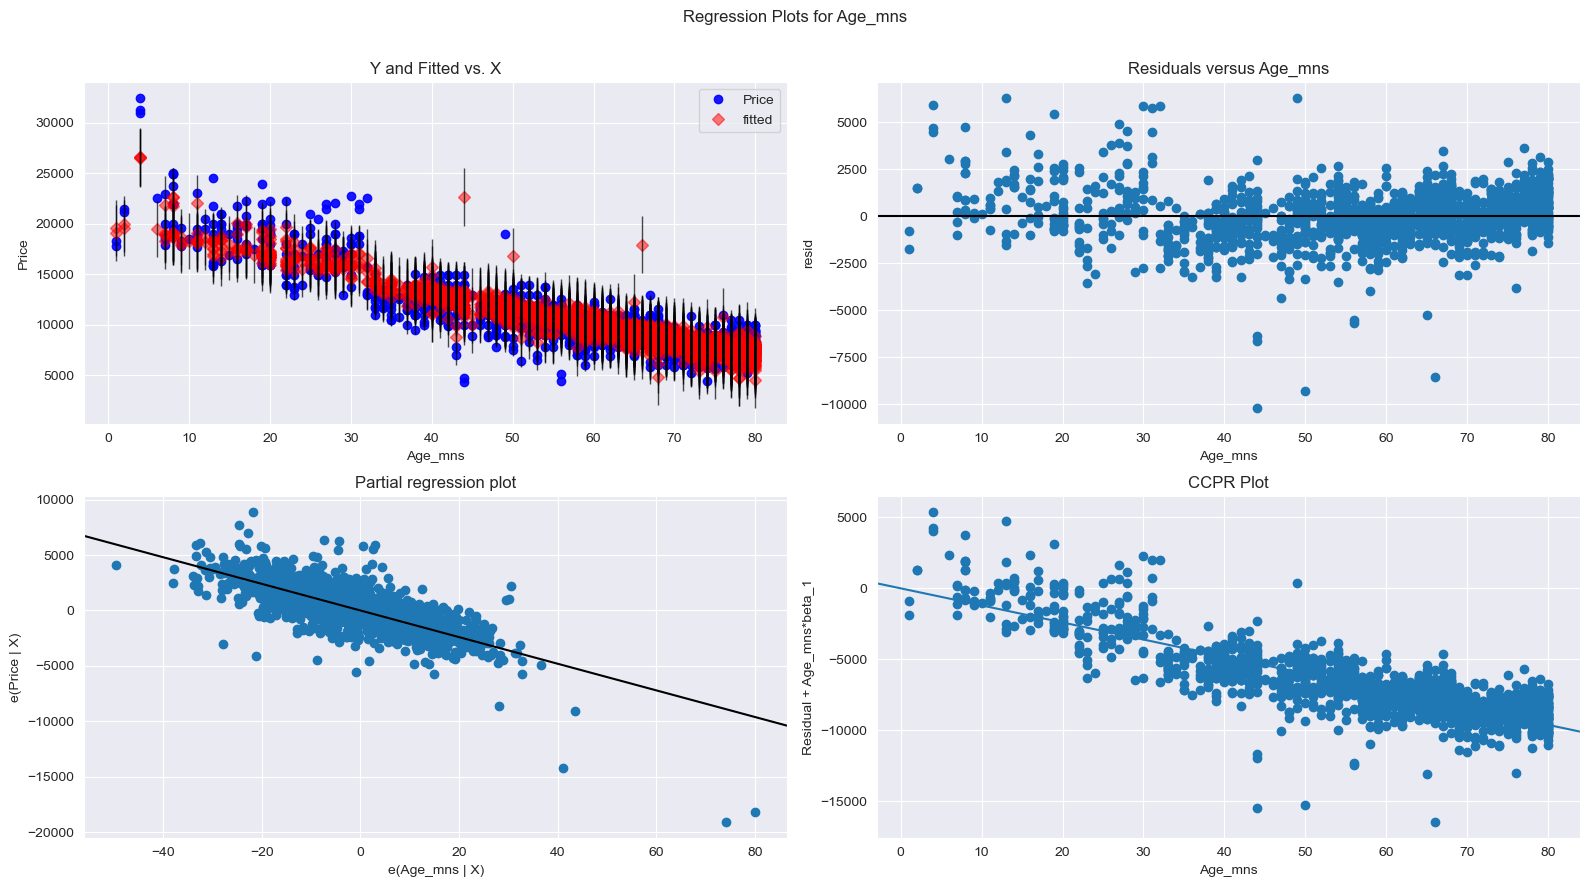

In [137]:
fig = plt.figure(figsize = (16,9))
plot_Age = sm.graphics.plot_regress_exog(model, 'Age_mns', fig=fig)
plt.show()

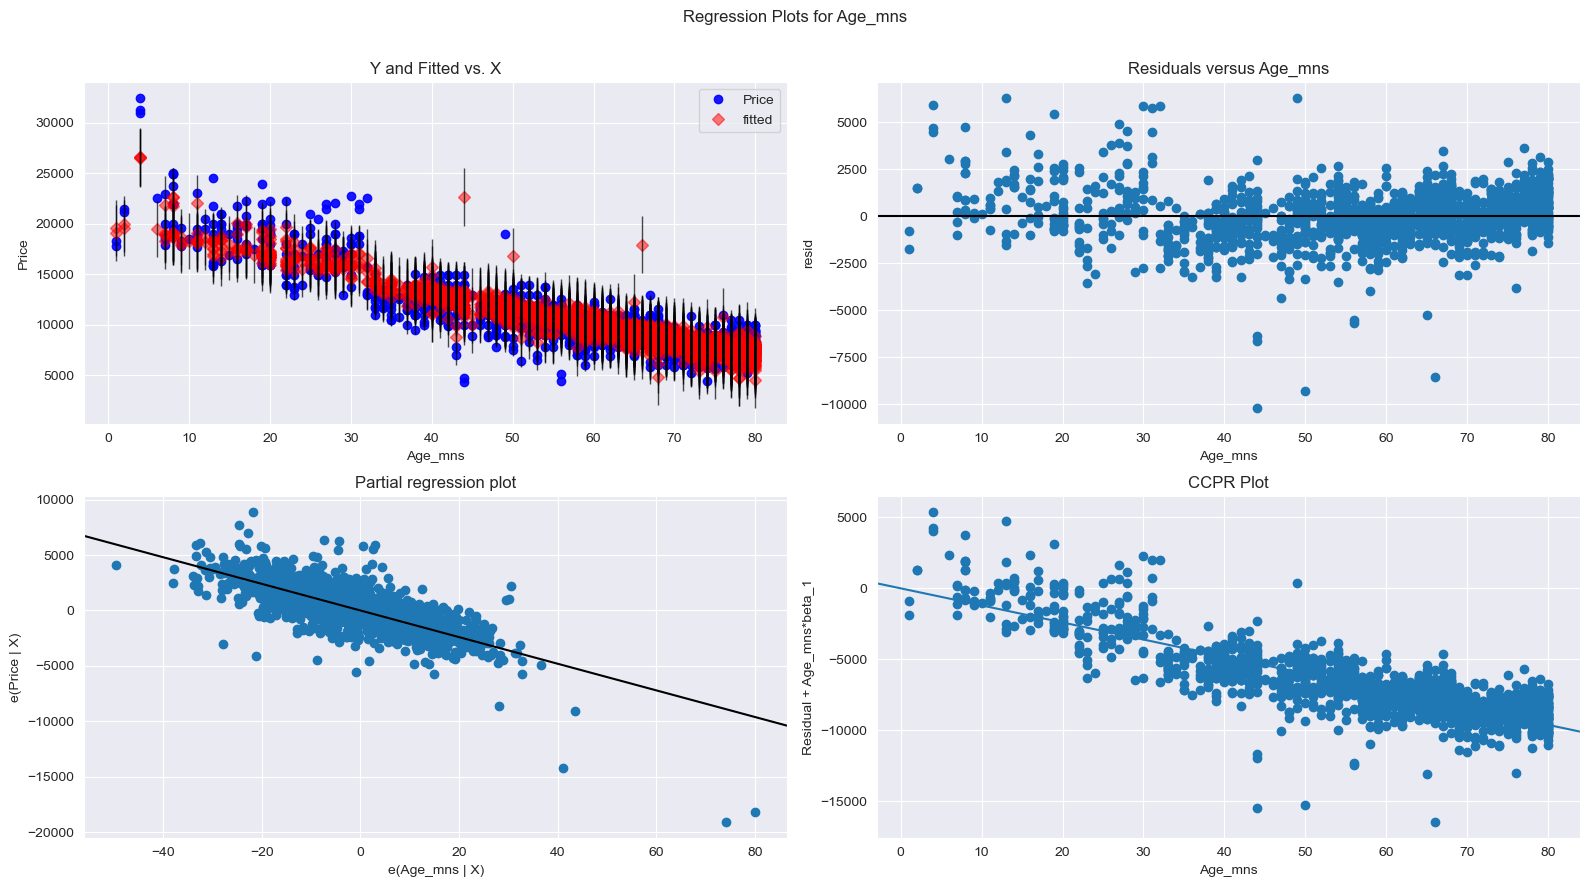

In [138]:
fig = plt.figure(figsize = (16,9))
plot_Age = sm.graphics.plot_regress_exog(model, 'Age_mns', fig=fig)
plt.show()

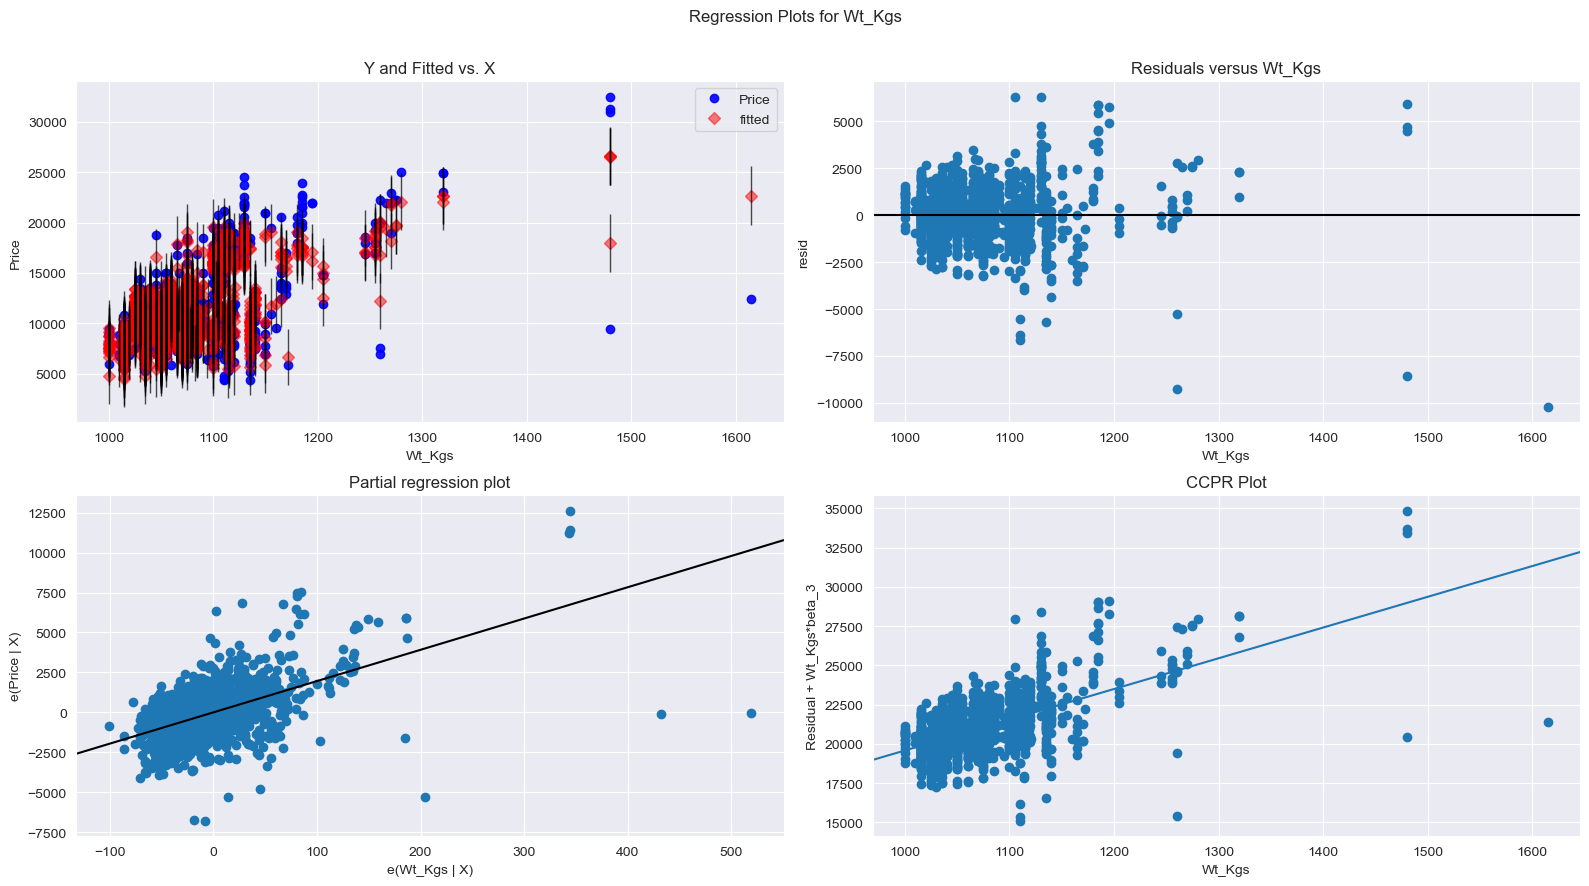

In [139]:
fig = plt.figure(figsize = (16,9))
plot_Weight = sm.graphics.plot_regress_exog(model, 'Wt_Kgs', fig=fig)
plt.show()

In [140]:
influence_points=model.get_influence()
c, p_value=influence_points.cooks_distance

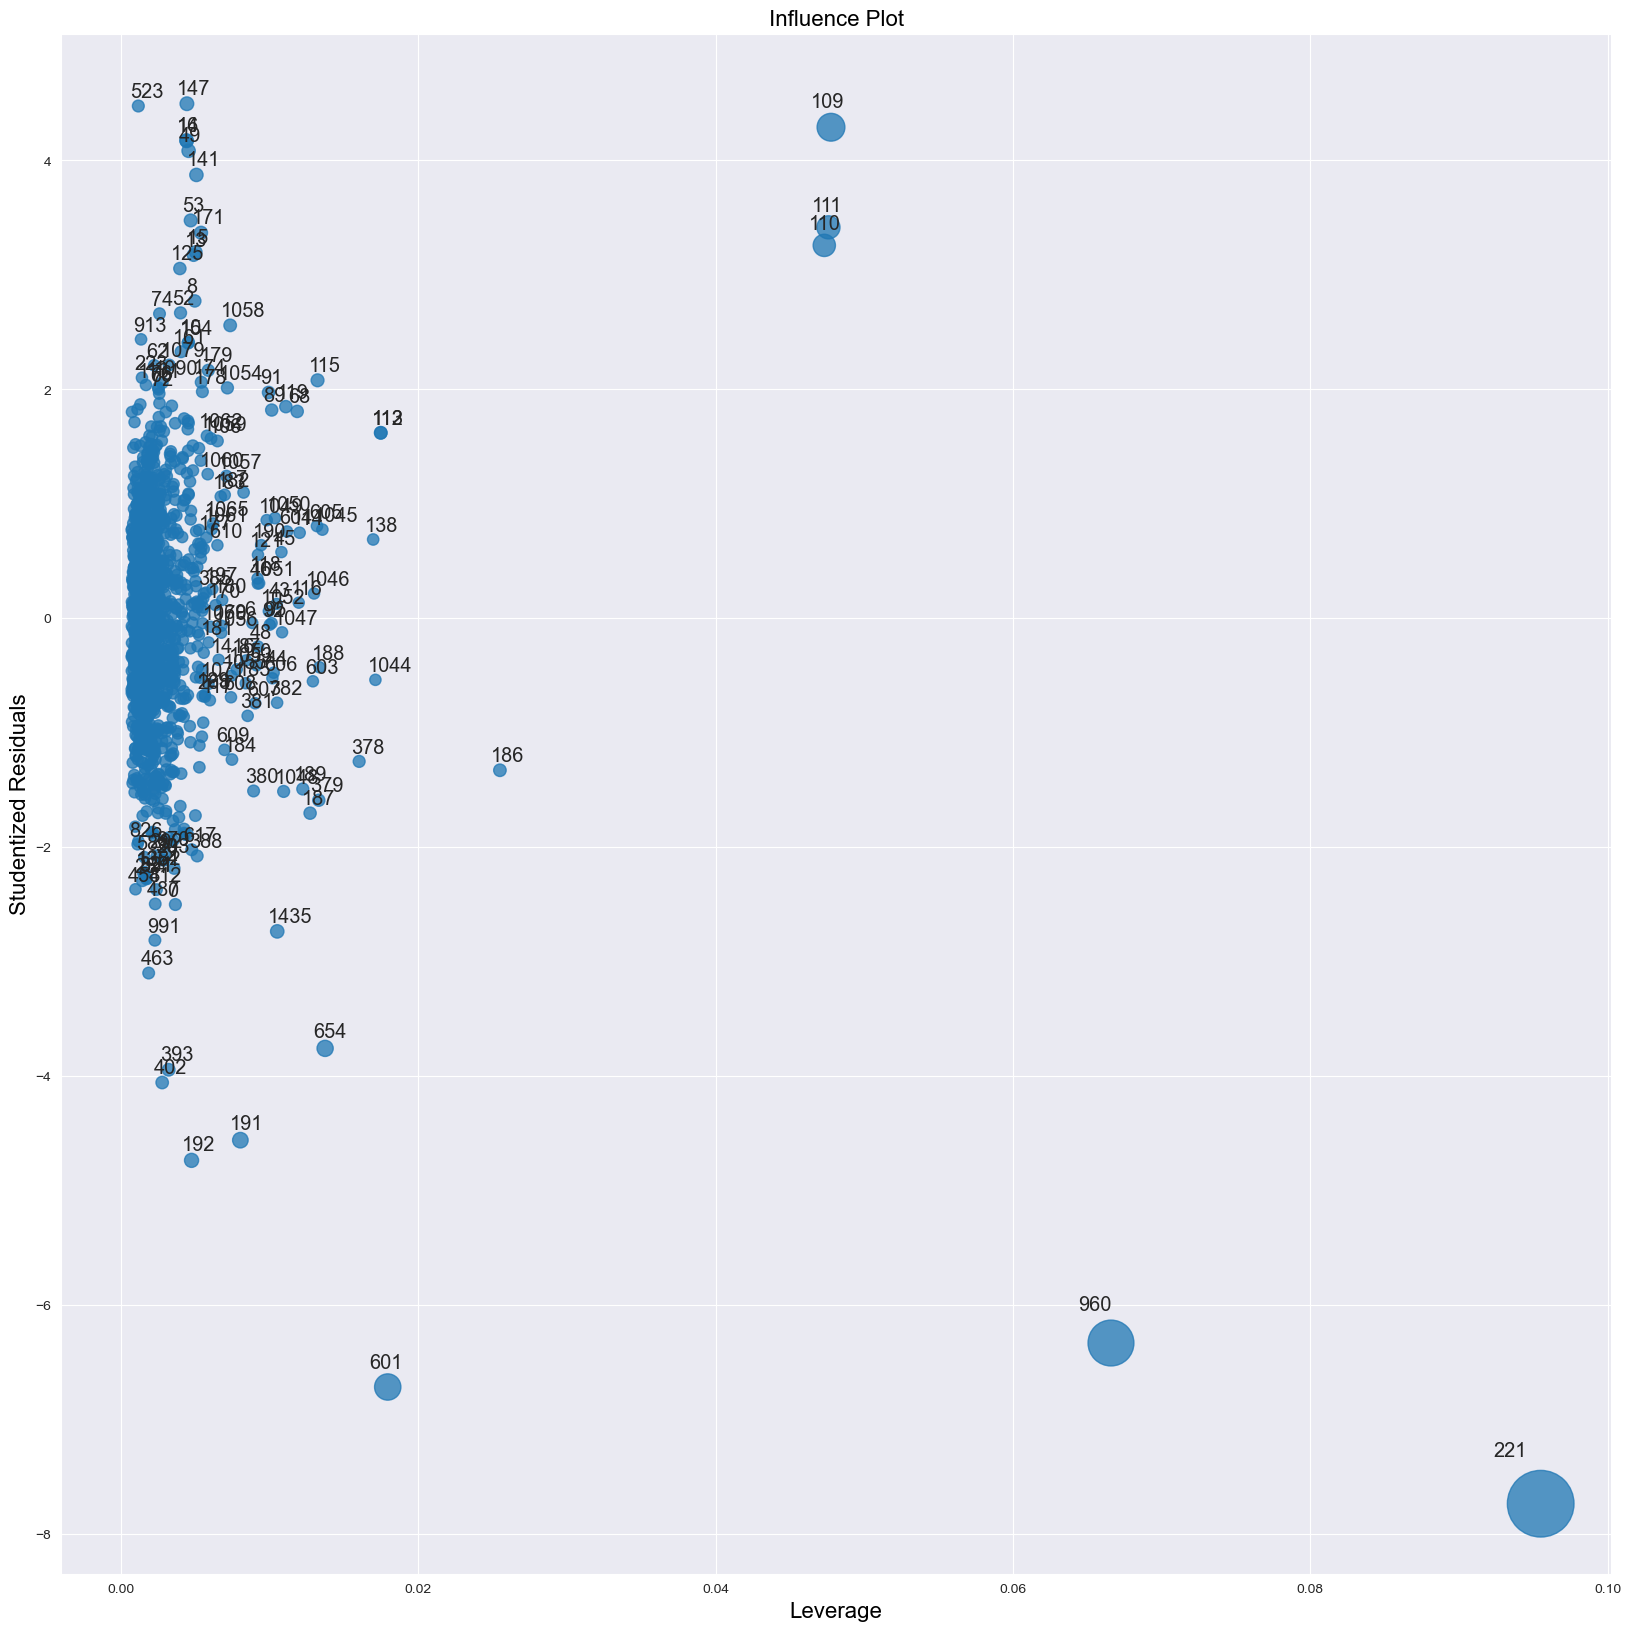

In [141]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)
plt.show()

In [142]:
k=crla_pr_cont.shape[1]
n=crla_pr_cont.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.01


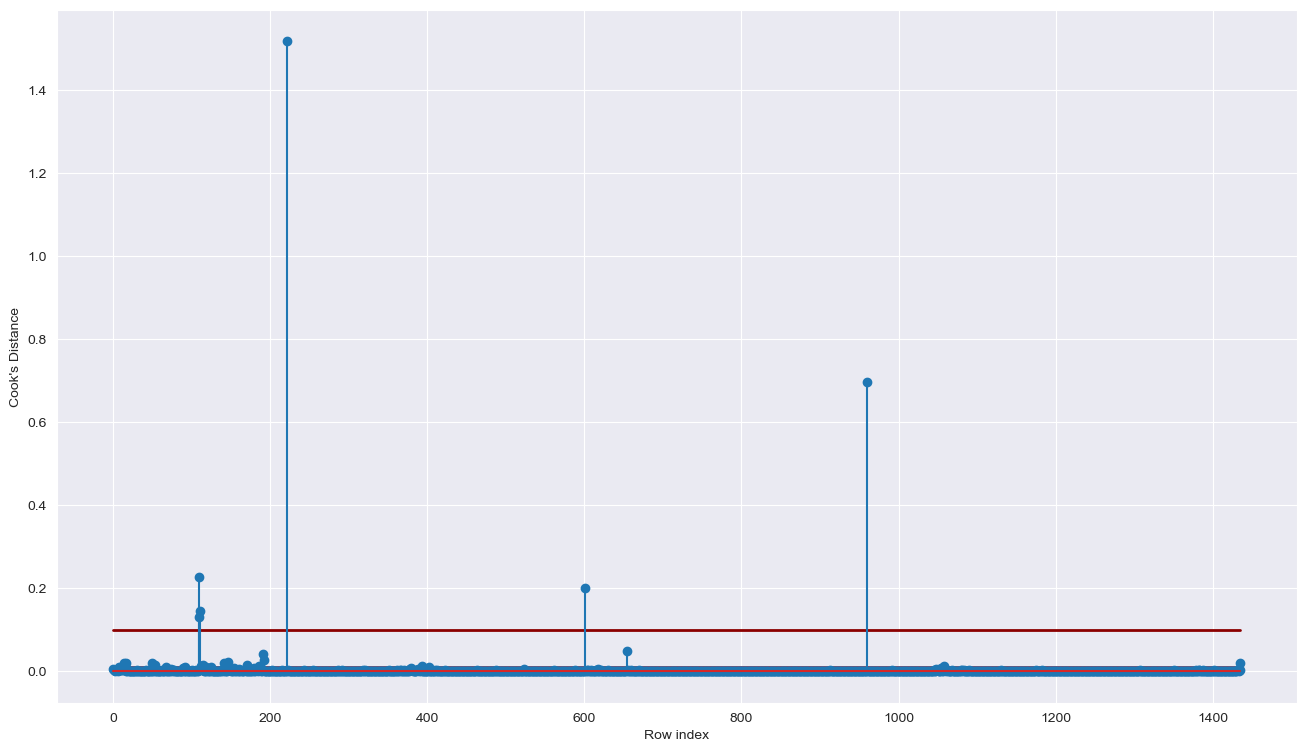

In [143]:
fig = plt.figure(figsize = (16,9))
x = [0,1435]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.01,0.01]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(crla_pr_cont)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [144]:
np.argmax(c) , np.max(c)

(221, 1.5165448352405297)

In [145]:
crla_pr_cont[crla_pr_cont.index.isin([220])] 

,Price,Age_mns,Run_KM,Wt_Kgs
220,11950,43,74285,1075


In [146]:
crla_pr_f= crla_pr_cont.copy()
crla_pr_f=crla_pr_f.drop(crla_pr_f.index[[220]],axis=0).reset_index(drop=True)
crla_pr_f.shape

(1435, 4)

In [147]:
while model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        model=smf.ols('Price~Age_mns+Run_KM+Wt_Kgs',data=crla_pr_f).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        crla_pr_f=crla_pr_f.drop(crla_pr_f.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        crla_pr_f
    else:
        model_f=smf.ols('Price~Age_mns+Run_KM+Wt_Kgs',data=crla_pr_f).fit()
        model_f.rsquared , model_f.aic
        print("Thus model accuracy is improved to",model_f.rsquared)

Thus model accuracy is improved to 0.8541674532457321
Thus model accuracy is improved to 0.8592323792668994
Thus model accuracy is improved to 0.8646315499264079
Thus model accuracy is improved to 0.862185293179536
Thus model accuracy is improved to 0.859596347396082
Thus model accuracy is improved to 0.8569729593579561
Thus model accuracy is improved to 0.8588061091742534
Thus model accuracy is improved to 0.8607698348653862
Thus model accuracy is improved to 0.861681980300481
Thus model accuracy is improved to 0.8639230622036991
Thus model accuracy is improved to 0.8646204462500903
Thus model accuracy is improved to 0.8653153276154261
Thus model accuracy is improved to 0.866184554665741
Thus model accuracy is improved to 0.866995671208452
Thus model accuracy is improved to 0.8673086766614727
Thus model accuracy is improved to 0.8676629877687224
Thus model accuracy is improved to 0.8664604771917832
Thus model accuracy is improved to 0.8666168057600439
Thus model accuracy is improved t

In [148]:
influence_points=model_f.get_influence()
c, p_value=influence_points.cooks_distance

In [149]:
crla_pr_f.shape

(907, 4)

In [150]:
crla_pr_f.head()

,Price,Age_mns,Run_KM,Wt_Kgs
0,14950,26,32692,1100
1,15500,22,41000,1100
2,14950,23,10000,1100
3,14750,27,27500,1100
4,15500,25,49163,1165


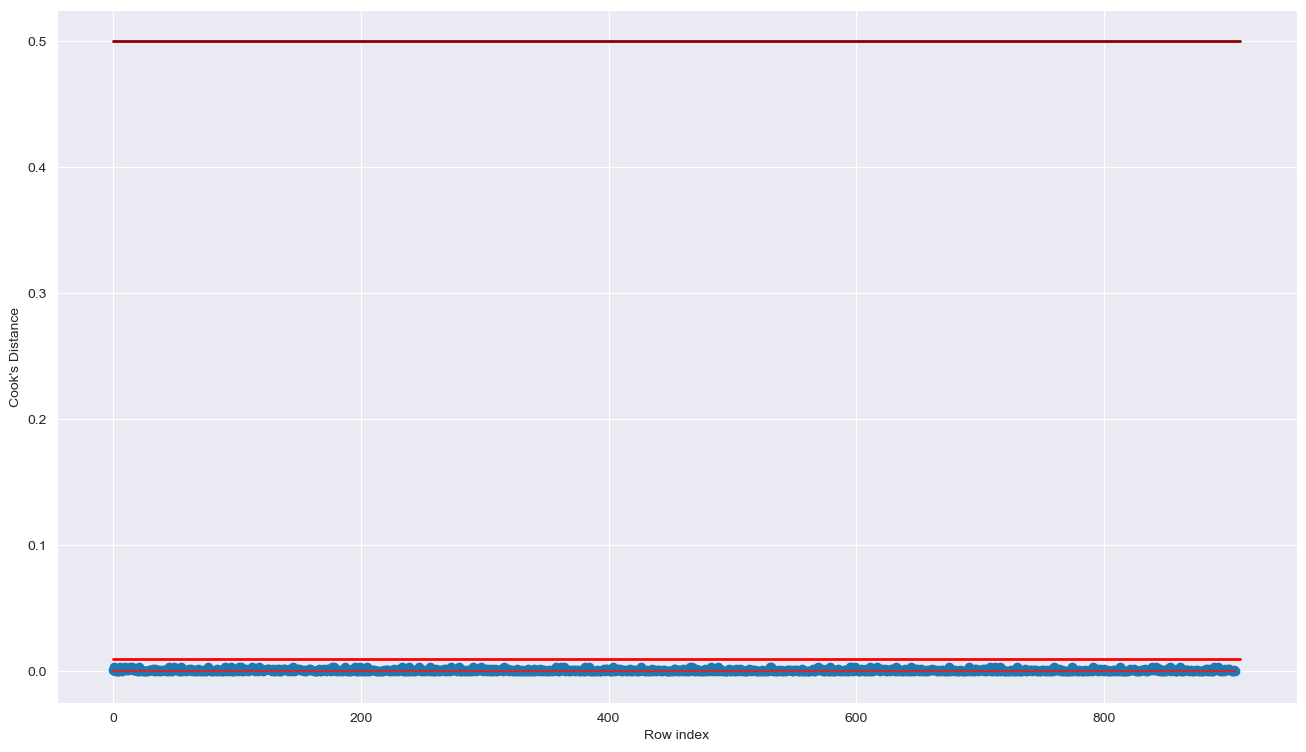

In [151]:
fig = plt.figure(figsize = (16,9))
x = [0,910]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.01,0.01]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(crla_pr_f)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [152]:
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     2728.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:57:02   Log-Likelihood:                -7078.0
No. Observations:                 907   AIC:                         1.416e+04
Df Residuals:                     903   BIC:                         1.418e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.0188    832.710      0.054      0.957   -1589.254    1679.291
Age_mns     -107.1176      1.710    -62.658      0.000    -110.473    -103.762
Run_KM        -0.0110      0.001    -13.537      0.000      -0.013      -0.009
Wt_Kgs        16.0816      0.762     21.116      0.000      14.587      17.576
==============================================================================
Omnibus:                       13.394   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.409
Skew:                           0.056   Prob(JB):                       0.0149
Kurtosis:                       2.542   Cond. No.                     3.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
rmse_f = np.sqrt(model_f.mse_resid)
rmse_f

594.0536697010434

In [154]:
newdata={'Age_mns':[10,20,30],'Run_KM':[10000,20000,10000],'Wt_Kgs':[1000,1500,2000]}

In [155]:
data_pred=pd.DataFrame(newdata,columns=['Age_mns','Run_KM','Wt_Kgs'])
data_pred

,Age_mns,Run_KM,Wt_Kgs
0,10,10000,1000
1,20,20000,1500
2,30,10000,2000


In [156]:
new_pred = model_f.predict(data_pred)
data_pred['Pred_Price']=np.round(new_pred,2)
data_pred

,Age_mns,Run_KM,Wt_Kgs,Pred_Price
0,10,10000,1000,14945.75
1,20,20000,1500,21805.67
2,30,10000,2000,28885.03
